In [3]:
ls


.                   .ipynb_checkpoints  HW2_part1.ipynb     HW2_part3.ipynb     helper_func         psnr2.png           
..                  Cross.jpg           HW2_part2.ipynb     IMG_0873.jpeg       moonlanding.png     




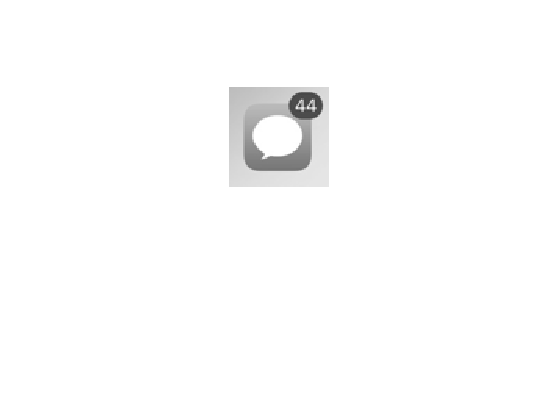

In [5]:
addpath('helper_func/');
part1_imgpath = '/';
filename = 'IMG_0873';
suffix = '.jpeg';
part3_64 = load_and_resize(part1_imgpath, filename, suffix, 64, true);

In [62]:
%%file helper_func/part3_double.m
function doubled = part3_double(img)
    extension1 = zeros(size(img));
    doubled = cat(1, img, extension1);
    extension2 = zeros(size(doubled));
    doubled = cat(2, doubled, extension2);
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part3_double.m'.


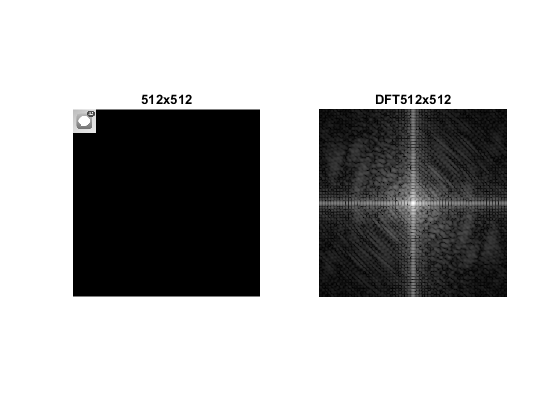

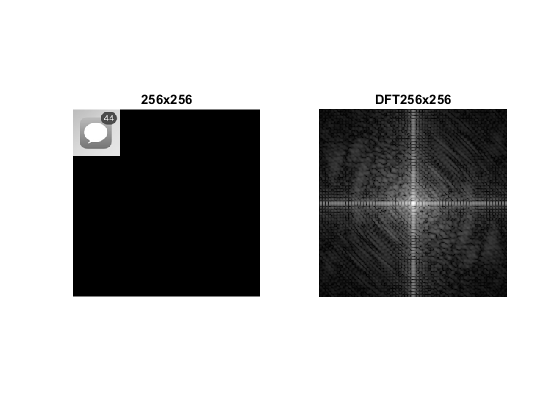

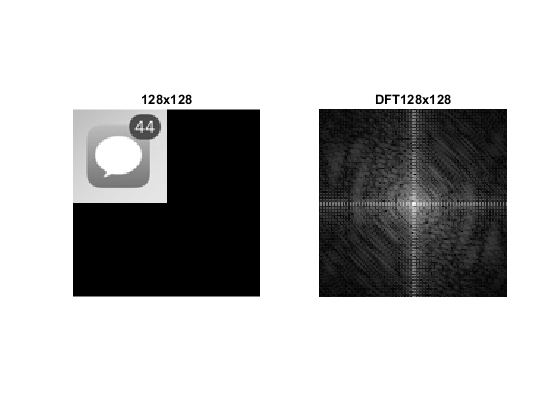

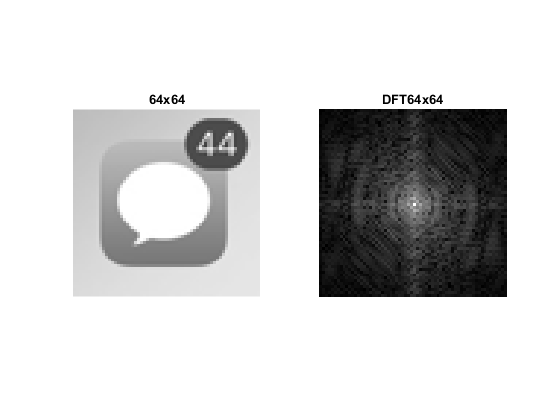

In [81]:
sizes = [64, 128, 256, 512];

img = part3_64;

resizedDFT = {};

for k = 1:length(sizes)

    num = num2str(sizes(k));
    filename = strcat('result/dft', num,'mag.jpg');
    title1 = strcat(num,'x',num);
    title2 = strcat('DFT ', title1);

    f = figure; 

    a = subplot(1, 2, 1);
    imshow(img); title(title1);

    DFT_M = abs(fftshift(fft2(img)));
    a = subplot(1, 2, 2); imshow(log(DFT_M+1), []); title(title2);

    imwrite(DFT_M, filename);

    img = part3_double(img);
    
    resizedDFT{end+1} = imresize(DFT_M, [512, 512]);

end


In [71]:
resizedDFT


resizedDFT =

  1x4 cell array

    {512x512 double}    {512x512 double}    {512x512 double}    {512x512 double}




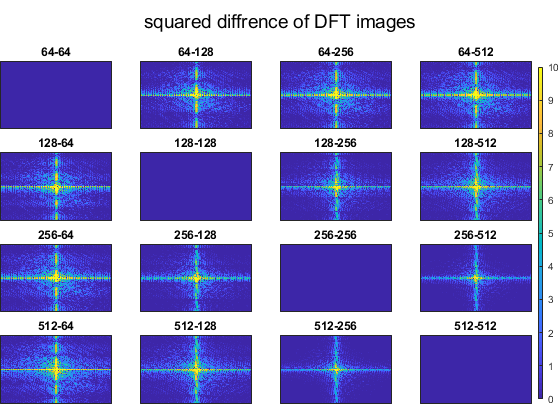

In [214]:
f = figure;

maxlabel = 7;
bottom = 0;
top = 10;

sq = 0.2;
w = 0;
h = 1 - sq;


gap = sq + 0.05;
for i = 1:length(sizes)
    for j = 1:length(sizes)
        n = (i-1)*4+(j-1)+1;
        
        diff = (resizedDFT{i} - resizedDFT{j});
        label = strcat(num2str(sizes(i)), '-', num2str(sizes(j)));
        
        a = subplot(4, 4, n);

        diff_log = real(log(diff.*diff+1));
%         diff_log = diff;

        imshow(diff_log, []);
        imagesc(diff_log); 
        caxis manual;
        caxis([bottom top]);
        title(label);
        set(gca,'xtick',[])
        set(gca,'ytick',[])
        l = w + (j-1)* gap;
        b = h - (i-1)*gap;
        set(gca,'position',[l, b, sq, sq])
    end
end
colorbar('Position', [l+sq+0.01  b 0.01  b+sq*3.7])
suptitle('squared diffrence of DFT images');

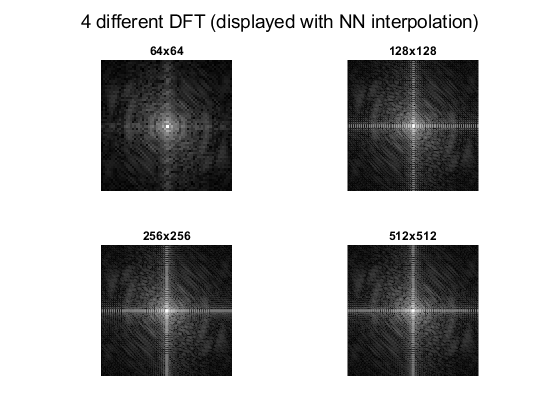

In [58]:
f = figure;
for i = 1:length(allDFT)
    a=subplot(2, 2, i);
    imshow(allDFT{i}, []);
    title(strcat(num2str(sizes(i)), 'x', num2str(sizes(i))));
end
suptitle('4 different DFT (displayed with NN interpolation)')


k = 

    "m m m     "


k =

    'm m m     '


m =

    'm m m  '


ans =

     7


l =

    'm m m  '


ans =

     7


